# Predicting the development of diabetes using machine learning

## Goal

My goal is to use sample data to train a model that can predict the probability of the development of diabetes in new patients. The data will be gathered and cleaned, then used to train the model using the supervised learning algorithm: logistic regression.

## Project

### The data

The dataset contains the following features:

- Age: The patient's age, in years.
- Gender: The patient's gender, male or female.
- BMI: The patient's body mass index (BMI), a measure of weight relative to height.
- Blood pressure: The patient's blood pressure, in mmHg.
- Fasting Blood Sugar: The patient's fasting blood sugar, in mg/dL.
- Hemoglobin A1c: The patient's hemoglobin A1c, a measure of blood sugar control over the past 3 months.
- Family history of diabetes: Whether the patient has a family history of diabetes.
- Smoking: Whether the patient smokes.
- Diet: Whether the patient has a poor or healthy diet.
- Exercise: Whether the patient exercises regularly.
- Diagnosis: The patient's diagnosis, either diabetes or no diabetes.


In [105]:
import pandas as pd

file_path = 'diabetes-classification-cleaned.csv'

# Creating a DataFrame from the CSV file
data_frame = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
data_frame.head()

,age,gender,bmi,blood_pressure,fasting_blood_sugar,hemoglobin_a1c,family_history_of_diabetes,smoking,diet,exercise,diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


The test data must be separated into test data and training data. The training data will be used to train the machine learning model to make predictions, then the test data will be used to exercise the model.

In [106]:
columns = data_frame.columns.values.tolist()
feature_columns = [col for col in columns if col != 'diagnosis']

# Displaying the applicable feature columns
print("Feature columns:", feature_columns)

Feature columns: ['age', 'gender', 'bmi', 'blood_pressure', 'fasting_blood_sugar', 'hemoglobin_a1c', 'family_history_of_diabetes', 'smoking', 'diet', 'exercise']


In [107]:
# Distinguishing features from the target variable 'diagnosis'
X_variables = data_frame[feature_columns] # features
y_variable = data_frame.diagnosis # target variable
print("Features:", end='\n')
print(X_variables, end='\n')
print("Target Variable:", end='\n')
print(y_variable, end='\n')

Features:
     age  gender  bmi blood_pressure  fasting_blood_sugar  hemoglobin_a1c  \
0     45    Male   25         Normal                  100             5.7   
1     55  Female   30           High                  120             6.4   
2     65    Male   35           High                  140             7.1   
3     75  Female   40           High                  160             7.8   
4     40    Male   20         Normal                   80             5.0   
..   ...     ...  ...            ...                  ...             ...   
123   17  Female   15         Normal                  100             5.7   
124   22    Male   19         Normal                  120             6.4   
125   27  Female   24           High                  140             7.1   
126   32    Male   29           High                  160             7.8   
127   37  Female   34           High                  180             8.5   

    family_history_of_diabetes smoking     diet exercise  
0     

In [108]:
# Some pre-processing must be done on String values in the dataset. For sklearn's LogisticRegression model,
# String values must be encoded to a data type that can be converted to a floating point value, like an integer.

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for column_name in data_frame.columns:
    if data_frame[column_name].dtype == object:
        data_frame[column_name] = label_encoder.fit_transform(data_frame[column_name])
    else:
        pass

# Isolating features and target variable with the pre-processed data
X = data_frame[feature_columns] # features
y = data_frame.diagnosis # target variable

# Shown below is the data set after the non-integer values are encoded as integer values
data_frame.head()

,age,gender,bmi,blood_pressure,fasting_blood_sugar,hemoglobin_a1c,family_history_of_diabetes,smoking,diet,exercise,diagnosis
0,45,1,25,2,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1
2,65,1,35,0,140,7.1,1,1,1,0,1
3,75,0,40,0,160,7.8,1,1,1,0,1
4,40,1,20,2,80,5.0,0,0,0,1,0


In [109]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Training Data Row Count:", len(X_train), end='\n')
print("Test Data Row Count:", len(X_test), end='\n')

Training Data Row Count: 96
Test Data Row Count: 32


### The model

I will be using the Logistic Regression machine learning model to predict the likelihood of a patient to develop diabetes, based on what we know about the features noted above. Logistic Regression is a machine learning algorithm where the probability of a binary outcome is determined by which side of the sigmoid function a data point lies.

The logistic regression is shown below as p(x), which represents the probability that an output value for a provided input is equal to 1 (cite). The coefficients &beta; represent the impact of the individual features on the outcome. Each coefficient represents one feature.

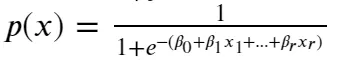

Here is the sigmoid function plotted on a graph (cite):

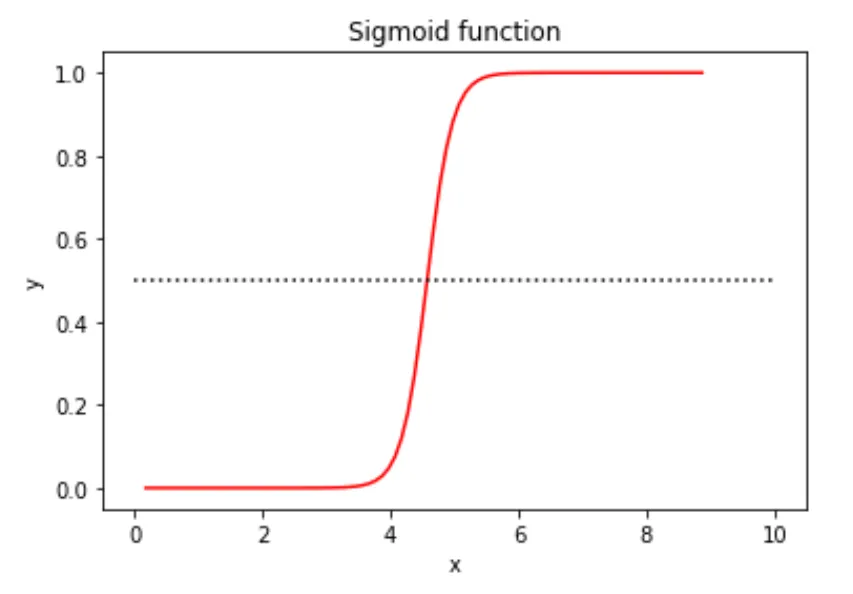

In order to make predictions, the logistic regression model must first be trained on the training data extracted above.

In [110]:
from sklearn.linear_model import LogisticRegression

# Using the indepdent variables, or features (x), and the dependent outcome, or target (y) to
# train the logistic regression model.
logistic_regression_model = LogisticRegression(max_iter=200).fit(X_train, y_train)

Before I use the trained model on the test data, I can get a good idea of how much any given feature had an affect on the outcome. By evaluating the coefficients (&beta; in the logistic regression function) in their exponential form, called "odds ratios" (cite) I am able to understand which features highly correlated with determining that a patient had a high probability of developing diabetes.

In [111]:
import numpy as np

coefficents = {"Features": ["Intercept"] + feature_columns,
              "Odds Ratios":np.concatenate(((logistic_regression_model.intercept_,np.exp(logistic_regression_model.coef_[0]))))}
pd.DataFrame(coefficents)

,Features,Odds Ratios
0,Intercept,1.958943
1,age,1.075278
2,gender,0.738887
3,bmi,0.899659
4,blood_pressure,0.383702
5,fasting_blood_sugar,0.983902
6,hemoglobin_a1c,0.997629
7,family_history_of_diabetes,0.055234
8,smoking,4.183549
9,diet,4.183549


The odds ratios above represent a percentage of impact on the probability that a patient eventually developed diabetes. For example, an odds ratio of 2.00 would mean that a feature had an impact on the outcome by 100%, and 1.20 would mean that a feature had 20% impact on an outcome. An odds ratio below 1 demonstrates a feature's very low impact on the outcome.

In this case, both whether a patient smoked or had a healthy diet had an impact of 318% on the probability that a patient would develop diabetes. The gender of the patient was a negligible factor; men weren't more or less likely to develop diabetes than women, in the training data.

We can observe this trend with the following histogram where:
- The `smoking` value is '0' for 'No' and '1' for 'Yes', shown in blue
- The `diet` value is '0' for 'Healthy' and '1' for 'Poor', shown in green
- The `diagnosis` value is '0' for 'No' and '1' for 'Yes', shown in purple

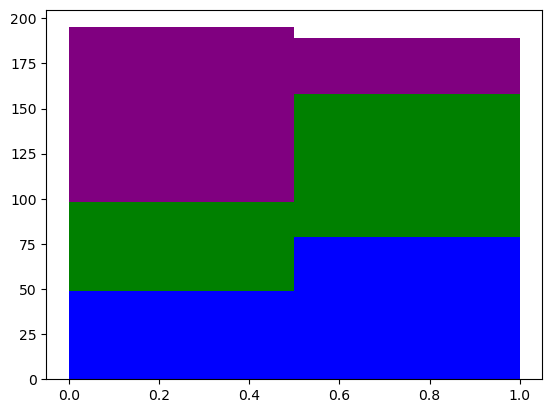

In [112]:
import matplotlib.pyplot as plt

_ = plt.hist([data_frame.smoking,data_frame.diet,data_frame.diagnosis],
          bins=2, range=(0,1), stacked=True, color = ['blue','green', 'purple'])

### Testing the model

Once the logistic regression model is trained, it can be used to make predictions on the test data extracted above.

In [113]:
from sklearn import metrics

y_prediction = logistic_regression_model.predict(X_test)

print("Actual:", list(y_test))
print("Predictions:", y_prediction)
print("Accuracy: {}.".format(round(metrics.accuracy_score(y_test, y_prediction), 4)))

Actual: [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
Predictions: [1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
Accuracy: 0.9375.


The accuracy score for the model's predictions was high, at 0.9375, or 93.75%. An accuracy score of 70% or higher signifies a successful prediction model, so this model successfully predicts the liklihood of a patient to develop diabetes given the patient data outlined here.

I can create a confusion matrix in order to get more details about the model's predictions. The model's predictions will be compared to the actual known values of the data set, where '0' indicates a 'No' for a diabetes diagnosis, and '1' indicates 'Yes'. A 'No' prediction is considered a Negative prediction, and a 'Yes' is considered Positive. Where the prediction matched the actual value of the diagnosis, that represents a True prediction, otherwise, the prediction is False. The confusion matrix will consist of four quadrants that will reveal, from left-to-right, the following values: True Negatives, False Positives, False Negatives, and True Positives.

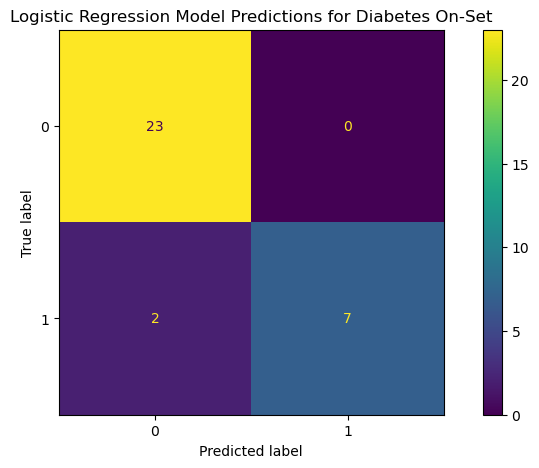

In [114]:
import matplotlib.pyplot as plt

# Creating a confusion matrix
figure, axis = plt.subplots(figsize=(10, 5))
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_prediction, ax=axis)
_ = axis.set_title("Logistic Regression Model Predictions for Diabetes On-Set")